In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from mdout_analyzer import mdout

In [24]:
def extract_energy_components(mdout_file):
    """
    Extract energy component values from mdout file.
    """
    my_mdout = mdout.AmberMdout(mdout_file)
    keys = list(my_mdout.data.keys())
    energy = {}
    for key in keys:
        energy[key] = my_mdout.data[key]
    df = pd.DataFrame.from_dict(energy)
    
    return df

In [25]:
prod_mdout = './prod-10.out'
df = extract_energy_components(mdout_file=prod_mdout)
df

,NSTEP,TIME(PS),TEMP(K),PRESS,Etot,EKtot,EPtot,BOND,ANGLE,DIHED,1-4 NB,1-4 EEL,VDWAALS,EELEC,EHBOND,RESTRAINT,EKCMT,VIRIAL,VOLUME,Density
0,10000.0,9.010221e+06,307.42,0.0,-73368.6280,17384.7734,-90753.4014,404.7990,1187.4111,1757.2136,504.5654,5514.8859,10825.0540,-110947.3304,0.0,0.0,0.0,0.0,280675.3887,1.0133
1,20000.0,9.010241e+06,310.74,0.0,-72895.8207,17572.6836,-90468.5043,450.6678,1150.4315,1750.2762,505.3698,5513.5858,10953.8523,-110792.6877,0.0,0.0,0.0,0.0,282382.3556,1.0071
2,30000.0,9.010261e+06,308.83,0.0,-72793.9547,17464.6445,-90258.5993,413.3054,1205.6397,1725.2686,524.5313,5550.3551,10752.7781,-110430.4775,0.0,0.0,0.0,0.0,282827.5395,1.0056
3,40000.0,9.010281e+06,306.42,0.0,-73114.9524,17328.2090,-90443.1614,395.9479,1227.3759,1730.0562,526.4214,5557.9373,11087.5590,-110968.4592,0.0,0.0,0.0,0.0,282695.8266,1.0060
4,50000.0,9.010301e+06,308.34,0.0,-72913.5657,17436.7871,-90350.3528,422.9434,1154.7921,1734.3903,503.3991,5551.9918,10955.6555,-110673.5252,0.0,0.0,0.0,0.0,282130.5190,1.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,499960000.0,1.001012e+07,309.59,0.0,-72853.2065,17507.2031,-90360.4096,474.2505,1194.6507,1758.6259,499.4294,5526.9120,10880.6987,-110694.9767,0.0,0.0,0.0,0.0,282184.3764,1.0078
49996,499970000.0,1.001014e+07,306.40,0.0,-72889.6375,17327.1465,-90216.7839,379.3020,1241.7190,1748.4690,509.8767,5584.6622,11187.4391,-110868.2520,0.0,0.0,0.0,0.0,283819.8753,1.0020
49997,499980000.0,1.001016e+07,310.25,0.0,-72762.2458,17544.5801,-90306.8259,436.7559,1179.5100,1716.6179,522.5520,5583.1521,11084.1238,-110829.5375,0.0,0.0,0.0,0.0,282711.5507,1.0060
49998,499990000.0,1.001018e+07,308.23,0.0,-72822.9242,17430.8164,-90253.7406,447.5194,1191.6423,1745.1934,511.8665,5600.0491,11034.7484,-110784.7597,0.0,0.0,0.0,0.0,281832.3888,1.0091


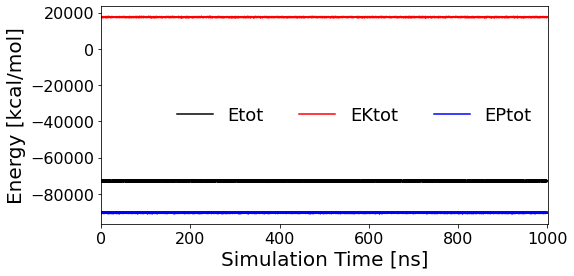

In [15]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
EPtot = df['EPtot'].to_list()
EKtot = df['EKtot'].to_list()
Etot = df['Etot'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 1001
ax.set_xlim([xmin, xmax])
plt.plot(time, Etot, color='black',  label='Etot') 
plt.plot(time, EKtot, color='red',  label='EKtot') 
plt.plot(time, EPtot, color='blue',  label='EPtot') 
plt.xlabel('Simulation Time [ns]', fontsize=20)
plt.ylabel(r'Energy [kcal/mol]', fontsize=20)
plt.xticks(np.arange(0, 1001, 200))
ax.tick_params(labelsize=16)
plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

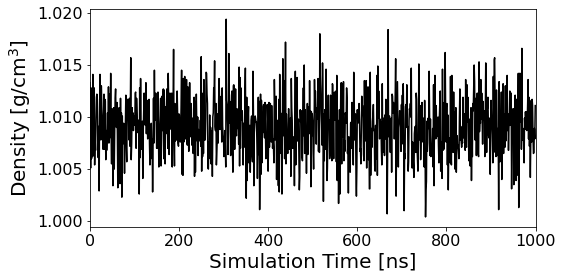

In [16]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
Density = df['Density'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 1001
ax.set_xlim([xmin, xmax])
plt.plot(time[::50], Density[::50], color='black',  label='Density') 
plt.xlabel('Simulation Time [ns]', fontsize=20)
plt.ylabel(r'Density [g/cm$^3$]', fontsize=20)
plt.xticks(np.arange(0, 1001, 200))
ax.tick_params(labelsize=16)
# plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

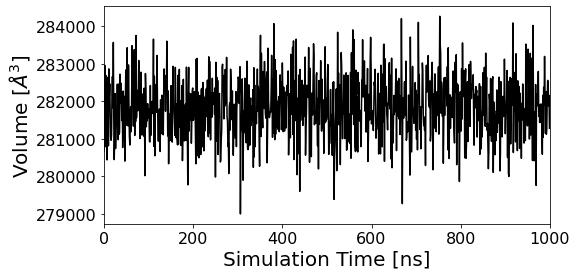

In [17]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
VOLUME = df['VOLUME'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 1001
ax.set_xlim([xmin, xmax])
plt.plot(time[::50], VOLUME[::50], color='black',  label='Volume') 
plt.xlabel('Simulation Time [ns]', fontsize=20)
plt.ylabel(r'Volume [$\AA^3$]', fontsize=20)
plt.xticks(np.arange(0, 1001, 200))
ax.tick_params(labelsize=16)
# plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

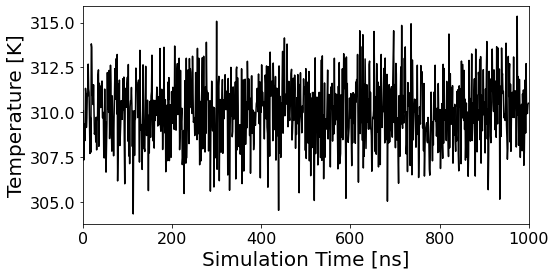

In [18]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
TEMP = df['TEMP(K)'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 1001
ax.set_xlim([xmin, xmax])
plt.plot(time[::50], TEMP[::50], color='black',  label='Temperature') 
plt.xlabel('Simulation Time [ns]', fontsize=20)
plt.ylabel(r'Temperature [K]', fontsize=20)
plt.xticks(np.arange(0, 1001, 200))
ax.tick_params(labelsize=16)
# plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

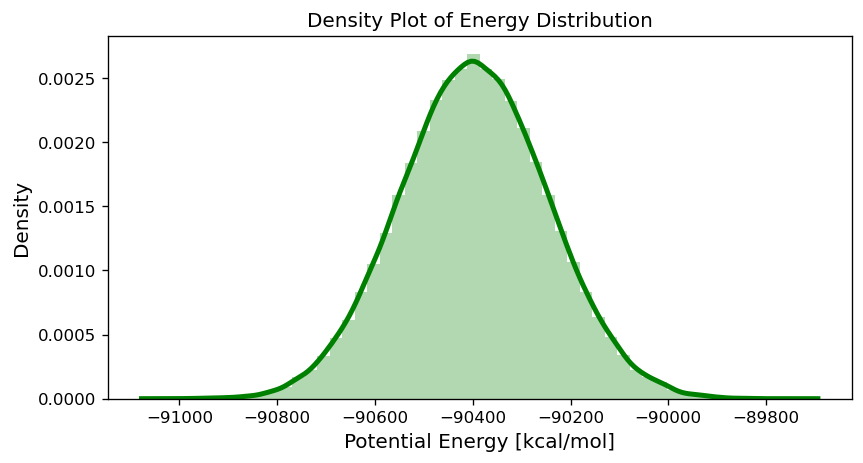

In [19]:
plt.figure(figsize=(8, 4), dpi=120)
sns.distplot(df.loc[df['PRESS']==0.0, "EPtot"], color="green", label="EPtot", hist_kws={'alpha':0.3}, kde_kws={'linewidth':3})
plt.title('Density Plot of Energy Distribution', fontsize=12)
# plt.legend()
plt.xlabel('Potential Energy [kcal/mol]', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

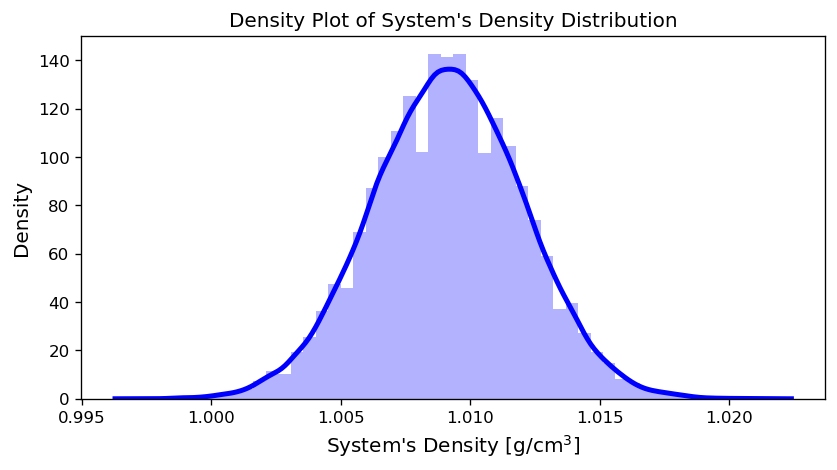

In [20]:
plt.figure(figsize=(8, 4), dpi=120)
sns.distplot(df.loc[df['PRESS']==0.0, "Density"], color="blue", label="Density", hist_kws={'alpha':0.3}, kde_kws={'linewidth':3})
plt.title("Density Plot of System's Density Distribution", fontsize=12)
# plt.legend()
plt.xlabel(r"System's Density [g/cm$^3$]", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

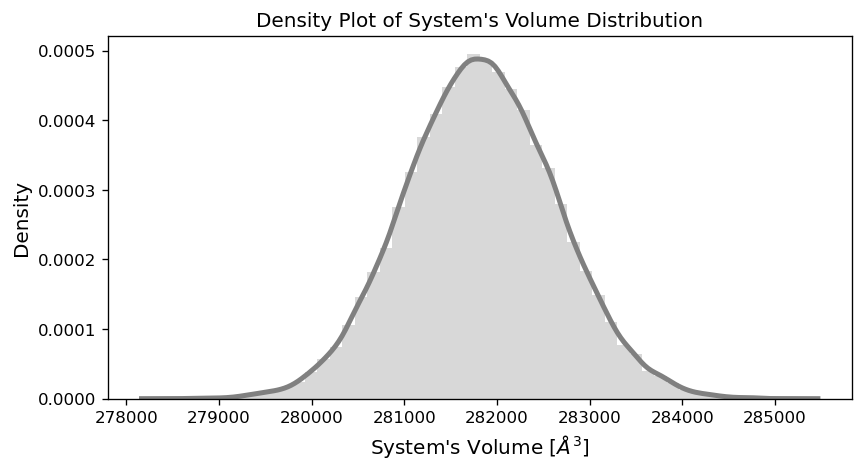

In [21]:
plt.figure(figsize=(8, 4), dpi=120)
sns.distplot(df.loc[df['PRESS']==0.0, "VOLUME"], color="grey", label="Volume", hist_kws={'alpha':0.3}, kde_kws={'linewidth':3})
plt.title("Density Plot of System's Volume Distribution", fontsize=12)
# plt.legend()
plt.xlabel(r"System's Volume [$\AA^3$]", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

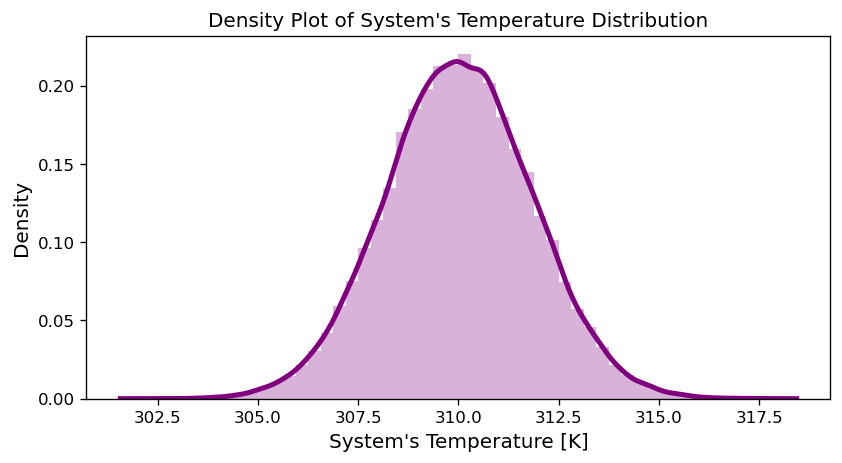

In [22]:
plt.figure(figsize=(8, 4), dpi=120)
sns.distplot(df.loc[df['PRESS']==0.0, "TEMP(K)"], color="purple", label="Temperature", hist_kws={'alpha':0.3}, kde_kws={'linewidth':3})
plt.title("Density Plot of System's Temperature Distribution", fontsize=12)
# plt.legend()
plt.xlabel(r"System's Temperature [K]", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()